<a href="https://colab.research.google.com/github/javier-jaime/Route-Recommender/blob/main/NGL_EDA_07_07_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

# Data Preparation

Import necessary libraries

In [58]:
import pandas as pd
import numpy as np

from google.colab import drive
from google.colab import files

from sklearn.cluster import KMeans # Uncomment if required

In [59]:
# Mount Google Drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Geometrix Data

In [60]:
# Read dataset from csv file in Google Drive to Pandas Data Frame
geo_data = pd.read_csv('drive/MyDrive/Colab_Data/Geometrix_data.csv')
print(geo_data.shape)

# Set an index if required
# geo_data.set_index('', inplace=True)

(27436, 18)


In [61]:
geo_data.head()

,railcar,trip_l_e,trip_statu,origin,origin_sta,trip_desti,trip_destn,actual_dep,actual_arr,returning,original_e,current_et,bill_of_la,shipper,consignee,product,quantity,unit
0,CBTX787523,L,C,Hanna,OH,Reybold,DE,1/1/2022 0:12,1/10/2022 3:29,1/12/2022 5:00,1/9/2022 6:40,1/10/2022 3:29,19303227,MAR-JEWETT_OH,PBF-DELAWARE_DE,NC4,147508.0,LBS
1,CBTX780871,L,C,Westland,PA,Toledo,OH,1/1/2022 0:01,1/6/2022 16:00,1/18/2022 13:30,1/12/2022 9:32,1/6/2022 16:00,12109821,MAR-WASHINGT_PA,TOL-OREGON_OH,NC4,143641.0,LBS
2,CGTX065396,L,C,Westland,PA,Toledo,OH,1/1/2022 0:01,1/6/2022 16:00,1/18/2022 13:30,1/12/2022 9:32,1/6/2022 16:00,12109818,MAR-WASHINGT_PA,TOL-OREGON_OH,NC4,146461.0,LBS
3,CTCX780278,L,C,Westland,PA,Toledo,OH,1/1/2022 0:01,1/6/2022 16:00,1/18/2022 13:30,1/12/2022 9:32,1/6/2022 16:00,12109819,MAR-WASHINGT_PA,TOL-OREGON_OH,NC4,143776.0,LBS
4,TILX308947,L,C,Sarnia,ON,Whtrvr Jct,VT,1/1/2022 0:25,1/10/2022 4:00,1/12/2022 6:33,1/7/2022 22:20,1/10/2022 4:00,190626SA,PLA-CALGARY_AB,N G-SARNIA_ON,C3O,132839.0,LBS


In [62]:
# Data is mostly loaded into Objects
geo_data.dtypes

railcar        object
trip_l_e       object
trip_statu     object
origin         object
origin_sta     object
trip_desti     object
trip_destn     object
actual_dep     object
actual_arr     object
returning      object
original_e     object
current_et     object
bill_of_la     object
shipper        object
consignee      object
product        object
quantity      float64
unit           object
dtype: object

In [63]:
# Describe Data Objects (Not null counts)
geo_data.describe(include=[object]).transpose()

,count,unique,top,freq
railcar,27436,6745,GATX204504,17
trip_l_e,27436,2,L,15156
trip_statu,27436,2,C,24436
origin,27436,499,Hanna,1951
origin_sta,27436,61,AB,3930
trip_desti,27415,483,Hanna,2179
trip_destn,27415,61,OH,3425
actual_dep,27436,12202,3/22/2022 7:00,44
actual_arr,27436,7656,/ / : :,1622
returning,27436,10259,/ / : :,3992


In [64]:
# The only numeric value is quantity
geo_data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
quantity,27436.0,67293.16,68324.74,0.0,0.0,0.0,130945.0,220300.0


count     27436.000000
mean      67293.162067
std       68324.736080
min           0.000000
25%           0.000000
50%           0.000000
75%      130945.000000
max      220300.000000
Name: quantity, dtype: float64

# of zeros: 13763


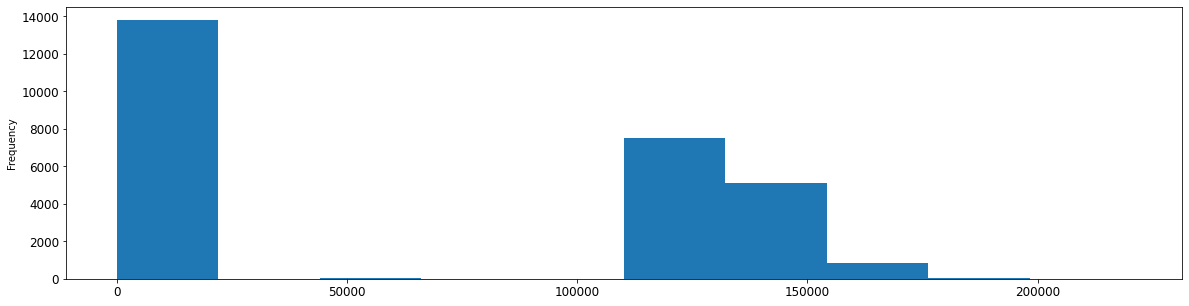

In [65]:
# Quantity Distribution is not OK, lots of zeros but not a match to empty cars
print(geo_data['quantity'].describe())
geo_data['quantity'].plot.hist(figsize = [20, 5], fontsize = 12)
print('\n# of zeros:', len(geo_data[geo_data['quantity']==0]))

L    15156
E    12280
Name: trip_l_e, dtype: int64


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


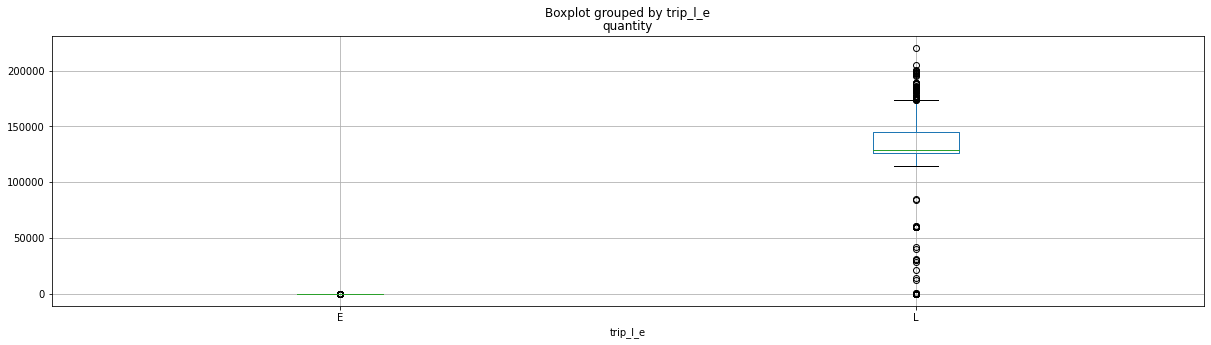

In [66]:
# Load/Empty Counts
print(geo_data.trip_l_e.value_counts())

# Load/Empty boxplot
geo_data.boxplot('quantity','trip_l_e', figsize = [20, 5])

In [67]:
# Empty with 100 lbs
geo_data[(geo_data['quantity']>0) & (geo_data['trip_l_e']=='E')]

,railcar,trip_l_e,trip_statu,origin,origin_sta,trip_desti,trip_destn,actual_dep,actual_arr,returning,original_e,current_et,bill_of_la,shipper,consignee,product,quantity,unit
854,TILX302035,E,C,Buncher,VA,Natrium,WV,1/6/2022 16:00,1/17/2022 0:47,2/17/2022 16:54,1/13/2022 3:00,1/17/2022 0:47,LV42699,APP-BUNCHER_VA,CEN-DENVER_CO,3742263,100.0,LBS
996,TILX305851,E,C,Cairo,OH,Hanna,OH,1/7/2022 12:11,1/25/2022 10:00,1/26/2022 5:38,1/20/2022 9:00,1/25/2022 10:00,BOL27800607,EAG-CAIRO_OH,MAR-HANNA_OH,3742263,100.0,LBS
1026,SHPX220924,E,C,Lima,OH,Natrium,WV,1/7/2022 14:22,1/20/2022 2:22,1/27/2022 18:09,1/13/2022 9:47,1/20/2022 2:22,035709LM,HUS-LIMA_OH,NGL-CALGARY_AB,3742263,100.0,LBS
1027,SHPX220952,E,C,Lima,OH,Moundsvill,WV,1/7/2022 14:22,1/16/2022 14:00,2/19/2022 21:31,1/13/2022 9:47,1/16/2022 14:00,035709LM,HUS-LIMA_OH,NGL-CALGARY_AB,3742263,100.0,LBS
2396,UTLX951093,E,C,Lima,OH,Columbus,OH,1/14/2022 15:20,1/21/2022 12:26,/ / : :,1/26/2022 22:10,1/21/2022 12:26,035736LM,HUS-LIMA_OH,NGL-SCIO_OH,3742263,100.0,LBS
2888,UTLX951118,E,C,Lima,OH,Columbus,OH,1/17/2022 15:22,1/23/2022 11:02,2/12/2022 9:48,1/29/2022 22:12,1/23/2022 11:02,035750LM,HUS-LIMA_OH,NGL-SCIO_OH,3742263,100.0,LBS
2889,UTLX951133,E,C,Lima,OH,Columbus,OH,1/17/2022 15:22,1/23/2022 11:02,2/12/2022 12:37,1/29/2022 22:12,1/23/2022 11:02,035750LM,HUS-LIMA_OH,NGL-SCIO_OH,3742263,100.0,LBS
3642,GATX061671,E,C,Wareco,GA,Natrium,WV,1/21/2022 8:02,1/31/2022 4:31,2/3/2022 5:31,1/28/2022 5:21,1/31/2022 4:31,57-012122JS02,GAT-WARECO_GA,BLU-NATRIUM_WV,3742263,100.0,LBS
3673,GATX204478,E,C,Wareco,GA,Natrium,WV,1/21/2022 9:18,2/2/2022 4:24,2/5/2022 17:23,2/1/2022 14:50,2/2/2022 4:24,057-012122-T4,GAT-WARECO_GA,BLU-NATRIUM_WV,3742263,100.0,LBS
4617,GATX057202,E,C,Wareco,GA,Natrium,WV,1/26/2022 11:46,2/7/2022 1:56,2/14/2022 12:34,2/5/2022 2:06,2/7/2022 1:56,057-012622-T5,GAT-WARECO_GA,BLU-NATRIUM_WV,3742263,100.0,LBS


In [68]:
# Loaded but missing quantities
geo_data[(geo_data['quantity']==0) & (geo_data['trip_l_e']=='L')]

,railcar,trip_l_e,trip_statu,origin,origin_sta,trip_desti,trip_destn,actual_dep,actual_arr,returning,original_e,current_et,bill_of_la,shipper,consignee,product,quantity,unit
29,PROX092936,L,C,Scotford,AB,Keenan,MN,1/1/2022 9:46,1/16/2022 7:50,/ / : :,1/11/2022 17:00,1/16/2022 7:50,NaN,NaN,NaN,NaN,0.0,NaN
30,TILX305605,L,C,Scotford,AB,Hixton,WI,1/1/2022 9:46,1/15/2022 11:25,/ / : :,1/9/2022 0:00,1/15/2022 11:25,NaN,NaN,NaN,NaN,0.0,NaN
75,CGTX065270,L,C,Sarnia,ON,Rockingham,VT,1/1/2022 16:14,1/21/2022 3:36,1/24/2022 11:00,1/20/2022 22:00,1/21/2022 3:36,NaN,NaN,NaN,NaN,0.0,NaN
76,CTCX732078,L,C,Med Hat,AB,Grande Pra,AB,1/1/2022 12:51,1/15/2022 13:48,1/18/2022 8:35,1/11/2022 14:00,1/15/2022 13:48,NaN,NaN,NaN,NaN,0.0,NaN
83,TILX305847,L,C,Sarnia,ON,Valleyfiel,PQ,1/1/2022 16:00,1/4/2022 9:50,1/10/2022 9:31,1/4/2022 9:00,1/4/2022 9:50,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27413,ACFX220137,L,A,Warren,PA,NaN,NaN,7/5/2022 11:00,/ / : :,/ / : :,/ / : :,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN
27414,CBTX780859,L,A,Warren,PA,NaN,NaN,7/5/2022 11:00,/ / : :,/ / : :,/ / : :,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN
27428,NBTX780689,L,A,Warren,PA,NaN,NaN,7/5/2022 11:00,/ / : :,/ / : :,/ / : :,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN
27429,NBTX784603,L,A,Warren,PA,NaN,NaN,7/5/2022 11:00,/ / : :,/ / : :,/ / : :,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN


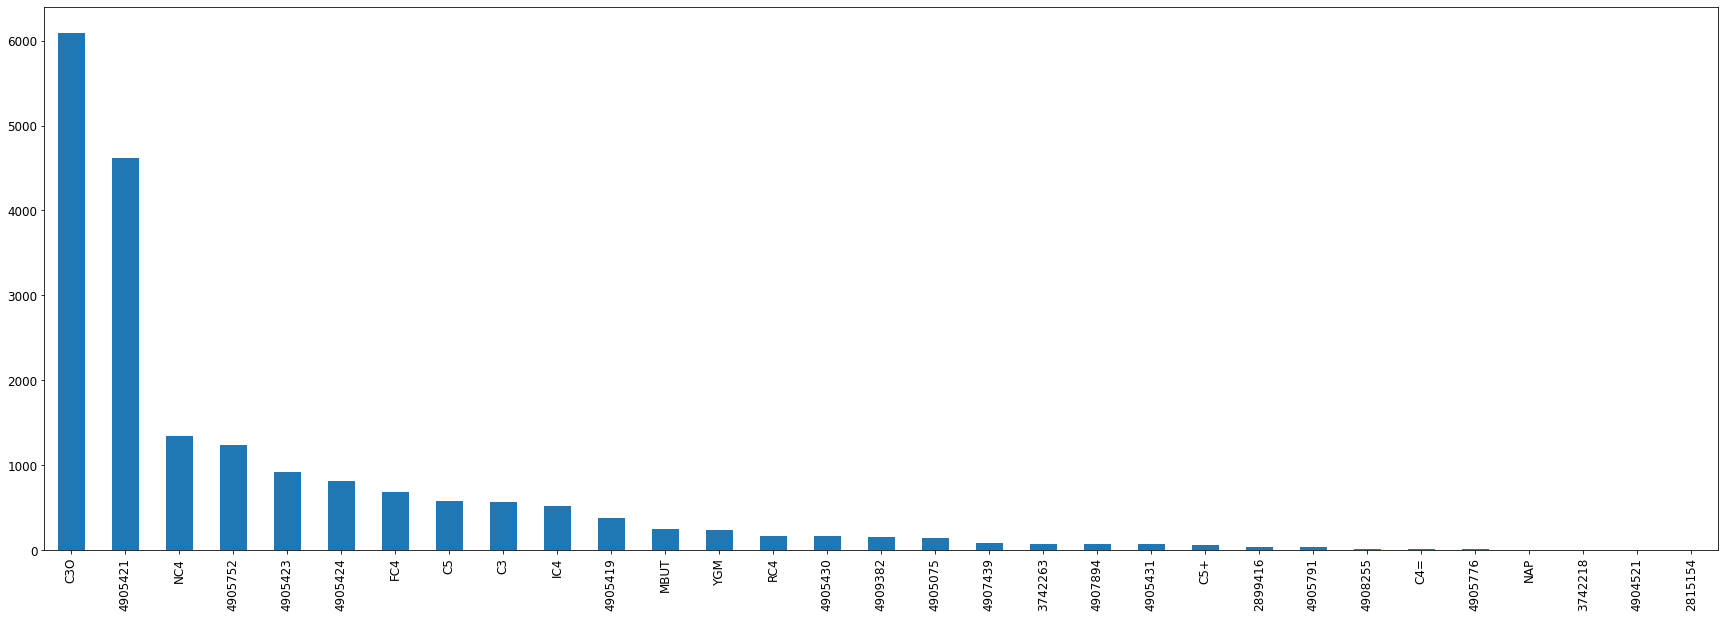

In [69]:
# Product Counts
geo_data['product'].value_counts().plot.bar(figsize = [30, 10], fontsize = 12)

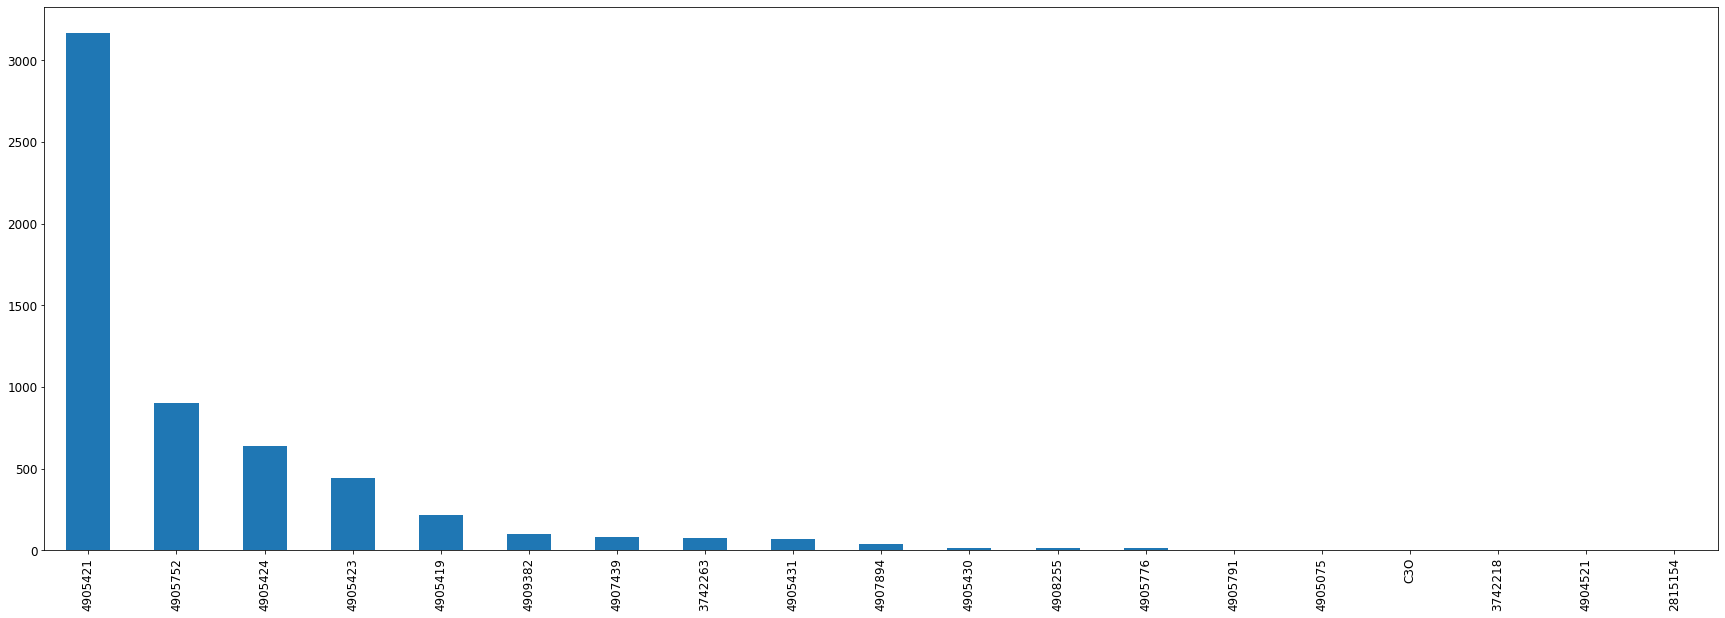

In [70]:
# Product Counts for Empty Cars
empty = geo_data[geo_data['trip_l_e']=='E']
empty['product'].value_counts().plot.bar(figsize = [30, 10], fontsize = 12)

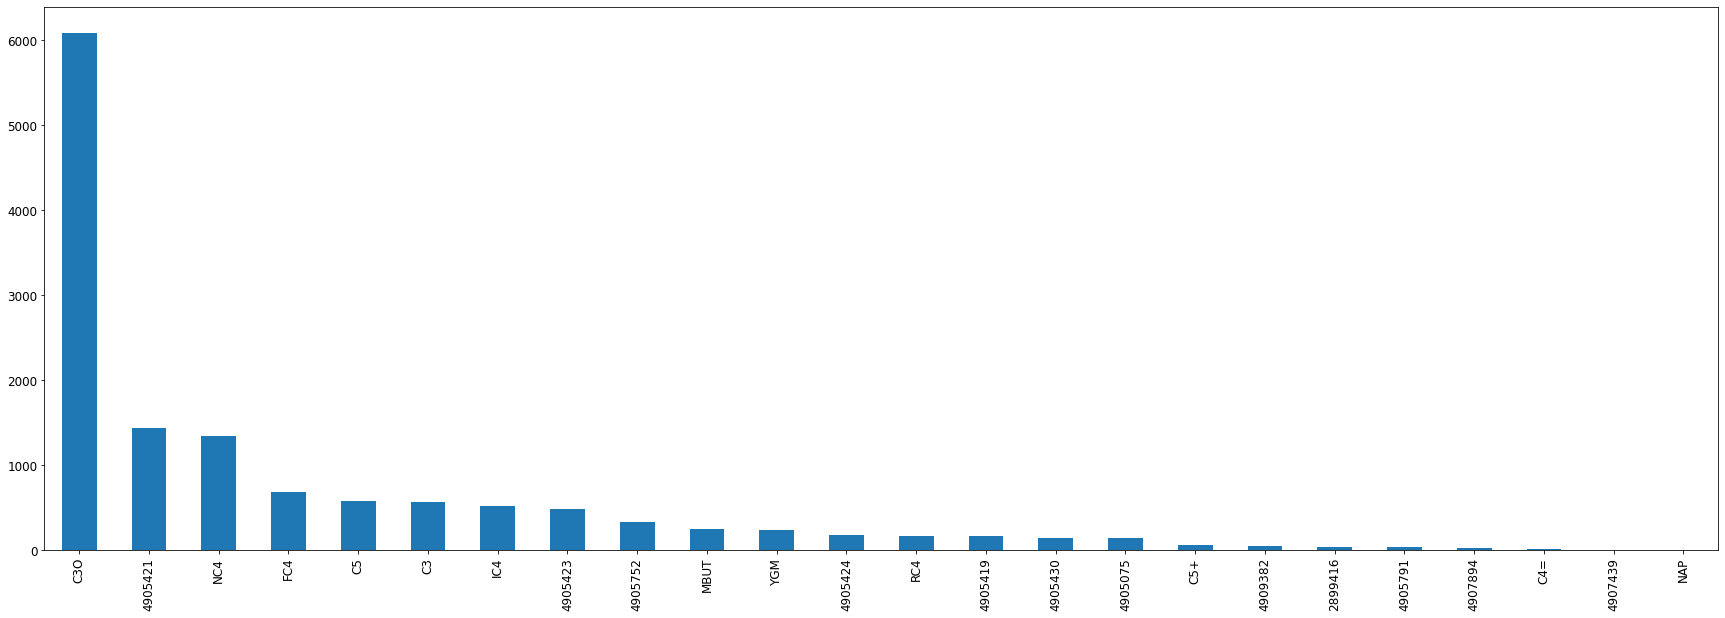

In [71]:
# Product Counts for Loaded Cars
loaded = geo_data[geo_data['trip_l_e']=='L']
loaded['product'].value_counts().plot.bar(figsize = [30, 10], fontsize = 12)

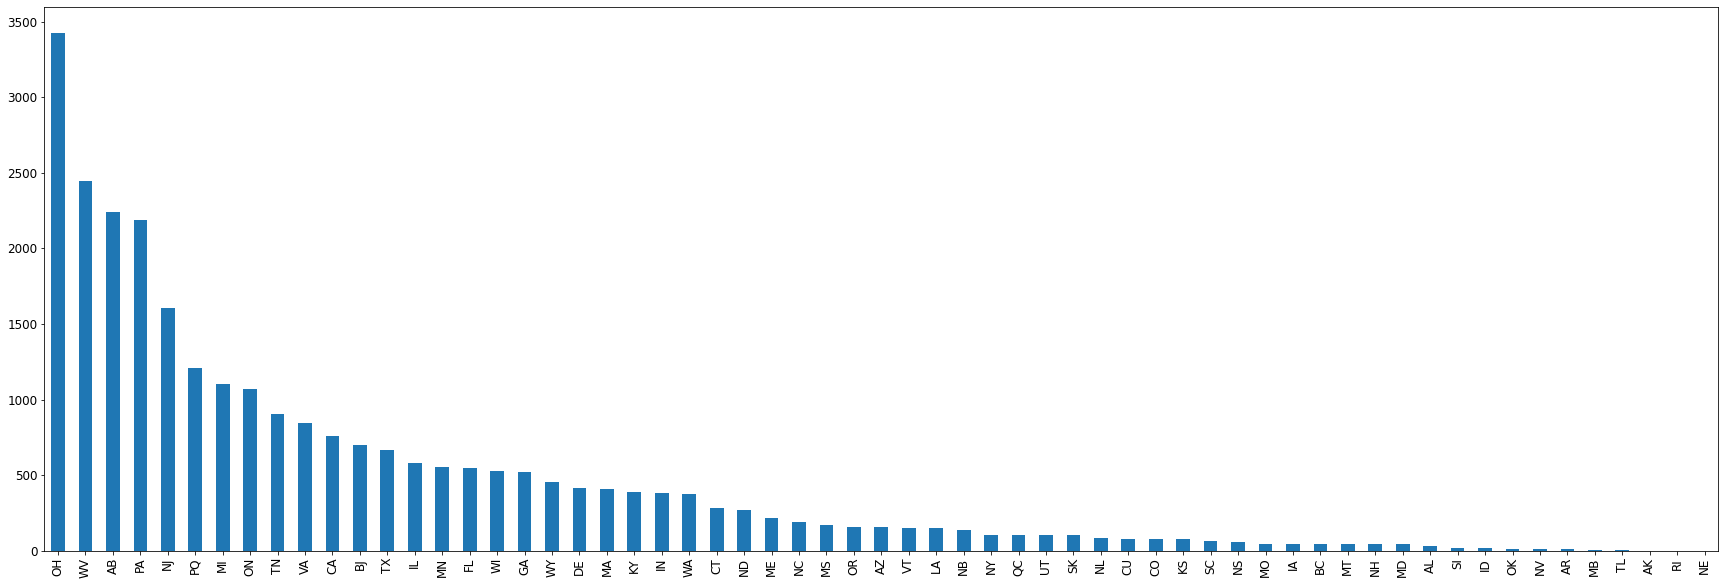

In [72]:
# List of Provinces/States detinations
geo_data.trip_destn.value_counts().plot.bar(figsize = [30, 10], fontsize = 12)

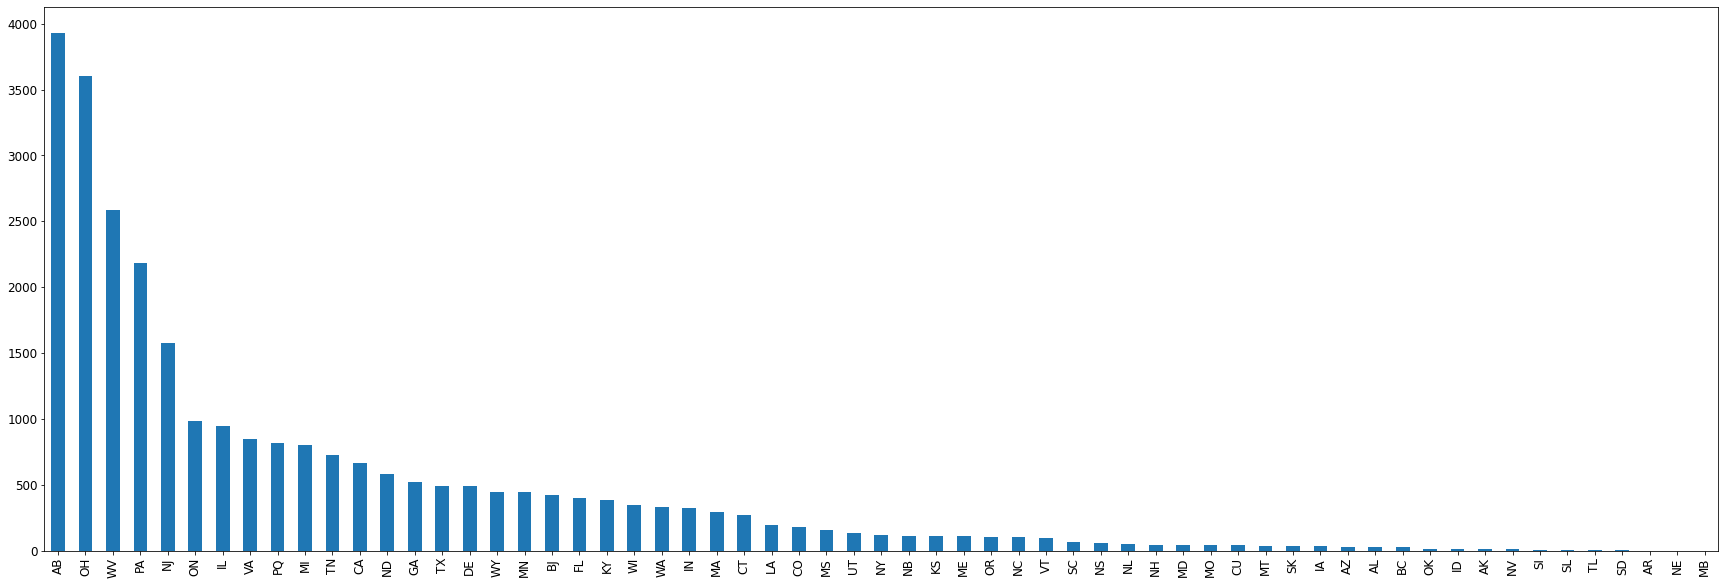

In [73]:
# List of Provinces/States origins
geo_data.origin_sta.value_counts().plot.bar(figsize = [30, 10], fontsize = 12)

In [127]:
# PQ and QC are bot for Quebec, PQ needs to be replaced
geo_data['trip_destn'].replace('PQ','QC', inplace=True)
geo_data['origin_sta'].replace('PQ','QC', inplace=True)
#

In [139]:
# Correct Mexican States Codes
geo_data['trip_destn'].replace('BJ','BC', inplace=True)
geo_data['origin_sta'].replace('BJ','BC', inplace=True)
geo_data['trip_destn'].replace('CU','CO', inplace=True)
geo_data['origin_sta'].replace('CU','CO', inplace=True)

In [99]:
# Convert timestamps columns to date-time format
# geo_data.iloc[:,[7,8,9,10,11]] = geo_data.iloc[:, [7,8,9,10,11]].apply(pd.to_datetime)

In [75]:
# Status Counts
print(geo_data.trip_statu.value_counts())

C    24436
A     3000
Name: trip_statu, dtype: int64


### Active Geo Data

In [140]:
# Split the dataset into Active and Complete
active_geo_data = geo_data[geo_data.trip_statu=="A"]

In [141]:
# Describe Active Data Objects (Not null counts)
active_geo_data.describe(include=[object]).transpose()

,count,unique,top,freq
railcar,3000,3000,ACFX220136,1
trip_l_e,3000,2,L,1657
trip_statu,3000,1,A,3000
origin,3000,189,Moundsvill,269
origin_sta,3000,48,WV,413
trip_desti,2994,200,Moundsvill,215
trip_destn,2994,48,WV,313
actual_dep,3000,1435,6/28/2022 7:00,21
actual_arr,3000,548,/ / : :,1619
returning,3000,3,/ / : :,2994


In [142]:
# Set an index
# active_geo_data.set_index('railcar', inplace=True)

# Drop no necessary columns
active_geo_data.drop(columns=['trip_statu','returning','original_e','current_et'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [144]:
# Empty/NA cells
active_geo_data.isnull().any()

railcar       False
trip_l_e      False
origin        False
origin_sta    False
trip_desti     True
trip_destn     True
actual_dep    False
actual_arr    False
bill_of_la     True
shipper        True
consignee      True
product        True
quantity      False
unit           True
dtype: bool

In [145]:
# Missing Destination
active_geo_data[active_geo_data.trip_desti.isnull()]

,railcar,trip_l_e,origin,origin_sta,trip_desti,trip_destn,actual_dep,actual_arr,bill_of_la,shipper,consignee,product,quantity,unit
27374,CTCX780348,L,Moundsvill,WV,NaN,NaN,7/4/2022 17:03,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN
27413,ACFX220137,L,Warren,PA,NaN,NaN,7/5/2022 11:00,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN
27414,CBTX780859,L,Warren,PA,NaN,NaN,7/5/2022 11:00,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN
27428,NBTX780689,L,Warren,PA,NaN,NaN,7/5/2022 11:00,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN
27429,NBTX784603,L,Warren,PA,NaN,NaN,7/5/2022 11:00,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN
27433,TILX303324,L,Warren,PA,NaN,NaN,7/5/2022 11:01,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN


In [146]:
# Missing bill of landing
active_geo_data[active_geo_data.bill_of_la.isnull()]

,railcar,trip_l_e,origin,origin_sta,trip_desti,trip_destn,actual_dep,actual_arr,bill_of_la,shipper,consignee,product,quantity,unit
735,ACFX220136,E,Busch,FL,Natrium,WV,1/6/2022 9:43,1/17/2022 0:47,NaN,NaN,NaN,NaN,0.0,NaN
6678,CTCX780459,E,Pascualit,BC,Sinclair,WY,2/6/2022 22:50,2/15/2022 8:30,NaN,NaN,NaN,NaN,0.0,NaN
6679,GATX074981,E,Pascualit,BC,Sinclair,WY,2/6/2022 22:50,2/15/2022 8:30,NaN,NaN,NaN,NaN,0.0,NaN
8999,CGTX065236,E,Pascualit,BC,Sinclair,WY,2/17/2022 16:07,3/1/2022 8:40,NaN,NaN,NaN,NaN,0.0,NaN
9000,CGTX065250,E,Pascualit,BC,Sinclair,WY,2/17/2022 16:07,3/1/2022 8:40,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27421,GATX075210,E,Lorenzo,IL,Hanna,OH,7/5/2022 10:09,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN
27424,GATX205751,E,Lorenzo,IL,Hanna,OH,7/5/2022 10:09,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN
27428,NBTX780689,L,Warren,PA,NaN,NaN,7/5/2022 11:00,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN
27429,NBTX784603,L,Warren,PA,NaN,NaN,7/5/2022 11:00,/ / : :,NaN,NaN,NaN,NaN,0.0,NaN


In [147]:
# Drop rows with Empty/NA cells comment/uncomment if required
active_geo_data = active_geo_data.dropna(axis=0)
print(active_geo_data.shape)
active_geo_data.isnull().any()

(2163, 14)


railcar       False
trip_l_e      False
origin        False
origin_sta    False
trip_desti    False
trip_destn    False
actual_dep    False
actual_arr    False
bill_of_la    False
shipper       False
consignee     False
product       False
quantity      False
unit          False
dtype: bool

In [148]:
active_geo_data.describe(include=[object]).transpose()

,count,unique,top,freq
railcar,2163,2163,GATX203293,1
trip_l_e,2163,2,L,1528
origin,2163,118,Moundsvill,252
origin_sta,2163,43,WV,394
trip_desti,2163,164,Sutton,111
trip_destn,2163,46,OH,162
actual_dep,2163,1055,6/28/2022 7:00,21
actual_arr,2163,398,/ / : :,1182
bill_of_la,2163,1978,300017,20
shipper,2163,120,WIL-MOUNDSVI_WV,252


In [149]:
# Bill of landing is not unique
active_geo_data.bill_of_la.value_counts().to_frame().transpose()

,300017,600920-005,002285WA,002257WA,9473,BOL28190487,AUTORR,R6848,000648ES,R6858,...,21839787IG,21839786IG,21839785IG,19314819,19314820,19314818,21839660IG,21839652IG,21839654IG,071562DC
bill_of_la,20,16,10,10,9,8,8,6,6,6,...,1,1,1,1,1,1,1,1,1,1


### Completed Geo Data

In [150]:
# Extract Completed Geo Data
complete_geo_data = geo_data[geo_data.trip_statu=="C"]

In [151]:
# Describe Complete Data Objects (Not null counts)
complete_geo_data.describe(include=[object]).transpose()

,count,unique,top,freq
railcar,24436,6391,GATX204504,16
trip_l_e,24436,2,L,13499
trip_statu,24436,1,C,24436
origin,24436,472,Hanna,1793
origin_sta,24436,58,AB,3669
trip_desti,24421,456,Hanna,2065
trip_destn,24421,57,OH,3162
actual_dep,24436,11093,6/13/2022 7:00,39
actual_arr,24436,7274,6/2/2022 6:44,38
returning,24436,10257,/ / : :,998


In [152]:
# Set an index
# complete_geo_data.set_index('railcar', inplace=True)

# Drop no necessary columns
complete_geo_data.drop(columns=['trip_statu','returning','original_e','current_et'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [153]:
# Empty/NA cells
complete_geo_data.isnull().any()

railcar       False
trip_l_e      False
origin        False
origin_sta    False
trip_desti     True
trip_destn     True
actual_dep    False
actual_arr    False
bill_of_la     True
shipper        True
consignee      True
product        True
quantity      False
unit           True
dtype: bool

In [154]:
# Missing Destination
complete_geo_data[complete_geo_data.trip_desti.isnull()]

,railcar,trip_l_e,origin,origin_sta,trip_desti,trip_destn,actual_dep,actual_arr,bill_of_la,shipper,consignee,product,quantity,unit
3621,CBTX787543,L,Toledo,OH,NaN,NaN,1/21/2022 5:57,1/21/2022 15:31,NaN,NaN,NaN,NaN,0.0,NaN
10237,CGTX065273,L,Torrance,CA,NaN,NaN,2/24/2022 17:44,2/25/2022 14:10,NaN,NaN,NaN,NaN,0.0,NaN
10239,CGTX065378,L,Torrance,CA,NaN,NaN,2/24/2022 17:44,2/25/2022 14:10,NaN,NaN,NaN,NaN,0.0,NaN
10241,CTCX780275,L,Torrance,CA,NaN,NaN,2/24/2022 17:44,2/25/2022 14:10,NaN,NaN,NaN,NaN,0.0,NaN
13217,TILX302374,L,Fairless,PA,NaN,NaN,3/14/2022 18:35,3/15/2022 22:00,NaN,NaN,NaN,NaN,0.0,NaN
13218,UTLX950948,L,Fairless,PA,NaN,NaN,3/14/2022 18:35,3/15/2022 22:00,NaN,NaN,NaN,NaN,0.0,NaN
13790,UTLX950920,L,Fairless,PA,NaN,NaN,3/18/2022 3:00,3/23/2022 0:30,NaN,NaN,NaN,NaN,0.0,NaN
14875,CGTX065380,L,Rogas,CA,NaN,NaN,3/25/2022 18:07,3/29/2022 19:12,NaN,NaN,NaN,NaN,0.0,NaN
15193,CTCX784010,L,Dore,ND,NaN,NaN,3/28/2022 16:20,3/30/2022 3:23,NaN,NaN,NaN,NaN,0.0,NaN
15832,GATX059144,L,Reybold,DE,NaN,NaN,4/3/2022 4:42,4/3/2022 6:44,NaN,NaN,NaN,NaN,0.0,NaN


In [155]:
# Missing bill of landing
complete_geo_data[complete_geo_data.bill_of_la.isnull()]

,railcar,trip_l_e,origin,origin_sta,trip_desti,trip_destn,actual_dep,actual_arr,bill_of_la,shipper,consignee,product,quantity,unit
27,CTCX780438,E,Dartmouth,NS,Levis,QC,1/1/2022 11:38,1/4/2022 2:48,NaN,NaN,NaN,NaN,0.0,NaN
29,PROX092936,L,Scotford,AB,Keenan,MN,1/1/2022 9:46,1/16/2022 7:50,NaN,NaN,NaN,NaN,0.0,NaN
30,TILX305605,L,Scotford,AB,Hixton,WI,1/1/2022 9:46,1/15/2022 11:25,NaN,NaN,NaN,NaN,0.0,NaN
75,CGTX065270,L,Sarnia,ON,Rockingham,VT,1/1/2022 16:14,1/21/2022 3:36,NaN,NaN,NaN,NaN,0.0,NaN
76,CTCX732078,L,Med Hat,AB,Grande Pra,AB,1/1/2022 12:51,1/15/2022 13:48,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26934,CBTX787080,L,S Beamer,AB,Lloydminst,AB,6/20/2022 7:39,6/24/2022 20:00,NaN,NaN,NaN,NaN,0.0,NaN
26937,CTCX340217,L,S Beamer,AB,Lloydminst,AB,6/22/2022 7:48,6/27/2022 15:00,NaN,NaN,NaN,NaN,0.0,NaN
26949,PROX032055,L,S Beamer,AB,Lloydminst,AB,6/20/2022 7:39,6/25/2022 13:00,NaN,NaN,NaN,NaN,0.0,NaN
26950,TILX305060,L,S Beamer,AB,Lloydminst,AB,6/20/2022 7:39,6/24/2022 20:00,NaN,NaN,NaN,NaN,0.0,NaN


In [156]:
# Drop rows with Empty/NA cells uncomment if required
complete_geo_data = complete_geo_data.dropna(axis=0)
print(complete_geo_data.shape)
complete_geo_data.isnull().any()

(17275, 14)


railcar       False
trip_l_e      False
origin        False
origin_sta    False
trip_desti    False
trip_destn    False
actual_dep    False
actual_arr    False
bill_of_la    False
shipper       False
consignee     False
product       False
quantity      False
unit          False
dtype: bool

In [157]:
# Bill of landing is not unique
complete_geo_data.bill_of_la.value_counts().to_frame().transpose()

,AUTORR,600920-005,NGL - MEXICALI - EP,220121,780759,780431,203160,787267,MT06122022,MTMINGO0322,...,1248798,19306697,1248767,19306705,1248766,BOL27978697,1248779,PL377969FSA,021529PR,9473
bill_of_la,248,87,42,30,27,25,20,17,16,14,...,1,1,1,1,1,1,1,1,1,1


In [158]:
# Describe Objects (Not null count)
complete_geo_data.describe(include=[object]).transpose()

,count,unique,top,freq
railcar,17275,5986,CTCX780419,13
trip_l_e,17275,2,L,12102
origin,17275,227,Hanna,1712
origin_sta,17275,48,AB,3167
trip_desti,17275,270,Hanna,776
trip_destn,17275,50,AB,1476
actual_dep,17275,7735,6/13/2022 7:00,39
actual_arr,17275,5019,6/2/2022 6:44,37
bill_of_la,17275,15834,AUTORR,248
shipper,17275,262,MAR-JEWETT_OH,1635


## Transactional Data

In [159]:
# Read dataset from csv file in Google Drive to Pandas Data Frame
trans_data = pd.read_csv('drive/MyDrive/Colab_Data/Transdata.csv')
print(trans_data.shape)

# Set an index if required
# trans_data.set_index('BillOfLading', inplace=True)

(132064, 34)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22,25,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [160]:
trans_data.head()

,ScheduleType,Internal Seq,Ref #,ProductCode,BillOfLading,NetUnits,UoM,BillOfLadingDate,ModeCode,TitleTransfer,...,BuyerLegalName,BuyerIDCode,CarrierCustomId,CarrierLegalName,CarrierIDCode,gross_receipts_amount,Currency,Description,In Transit Flg,Description.1
0,Sales Shipment,3.0,3968222,C3o,101003,15000,USG,01-01-2022,Truck,FOB Destination,...,McDougall Energy Inc.,NaN,34507.0,"Dave Hausebeck Trucking, Inc.",382439285.0,27823.91,CAD,"Spragge, ON Facility, ON",False,Shipped
1,Sales Shipment,3.0,3970709,C3o,2124992,3441,USG,01-01-2022,Truck,FOB Origin,...,Energies Sonic,NaN,NaN,NaN,NaN,6511.59,CAD,Beauharnois PQ - Beauharnois Terminal - NGL Su...,False,Shipped
2,Intercompany,2.0,3970709,C3o,2124992,3441,USG,01-01-2022,Inventory Xfer,FOB Origin with Freight Recovery,...,NGL Supply Co. Ltd.,980364283.0,NaN,NaN,NaN,0.00,CAD,Beauharnois PQ - Beauharnois Terminal - NGL Su...,False,Shipped
3,Storage,NaN,3971489,C3,STORFEE-JANUARY2022,0,USG,01-01-2022,Inventory Xfer,FOB Origin,...,NGL Supply Co. Ltd.,980364283.0,NaN,NaN,NaN,-60000.00,CAD,"Keyera Fort Saskatchewan Facility, AB",False,Shipped
4,Storage,NaN,3971490,FC4,STORFEE-JANUARY2022,0,USG,01-01-2022,Inventory Xfer,FOB Origin,...,NGL Supply Co. Ltd.,980364283.0,NaN,NaN,NaN,-27626.70,CAD,"Keyera Fort Saskatchewan Facility, AB",False,Shipped


In [161]:
trans_data.describe(include=[object]).transpose()

,count,unique,top,freq
ScheduleType,132064,6,Sales Shipment,47261
ProductCode,132064,14,C3o,85688
BillOfLading,132064,52925,220121,120
UoM,132064,1,USG,132064
BillOfLadingDate,132064,90,01-31-2022,2137
ModeCode,132064,4,Truck,90384
TitleTransfer,132064,10,FOB Destination,62090
OriginDescription,132064,204,"Paradis, LA Facility, LA",4848
OriginCity,132026,162,Paradis,4848
OriginJurisdiction,132032,39,OH,11568


In [162]:
trans_data.OriginCountryCode.value_counts()

USA    108913
CAN     23119
Name: OriginCountryCode, dtype: int64

In [163]:
trans_data.Currency.value_counts()

USD    105666
CAD     10659
Name: Currency, dtype: int64

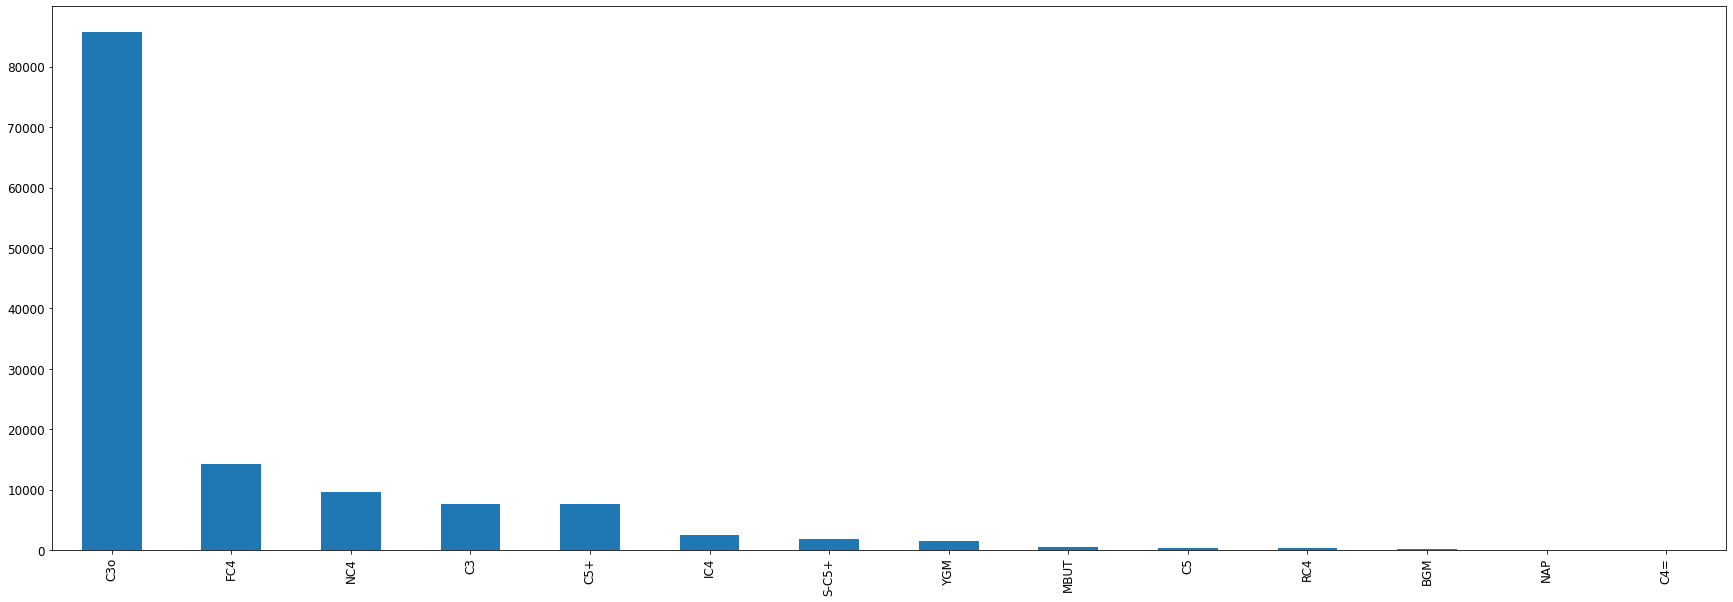

In [164]:
trans_data.ProductCode.value_counts().plot.bar(figsize = [30, 10], fontsize = 12)

In [165]:
# Drop rows with Empty/NA cells uncomment if required
# trans_data = trans_data.dropna(axis=0)
# print(trans_data.shape)
# trans_data.isnull().any()

In [166]:
# Bill of landing is not unique
trans_data.BillOfLading.value_counts().to_frame().transpose()

,220121,4370-3,220139,135534,305906,203148,FEB2022.VOLUME,STORFEE-MARCH2022,44643,STORFEE-FEB2022,...,GATX9667,TILX303388,NBTX784677,55620112128,PROX39227,TILX309109,PROX696255,PROX93691,TILX305815,4157104
BillOfLading,120,60,40,40,40,40,23,15,15,15,...,1,1,1,1,1,1,1,1,1,1


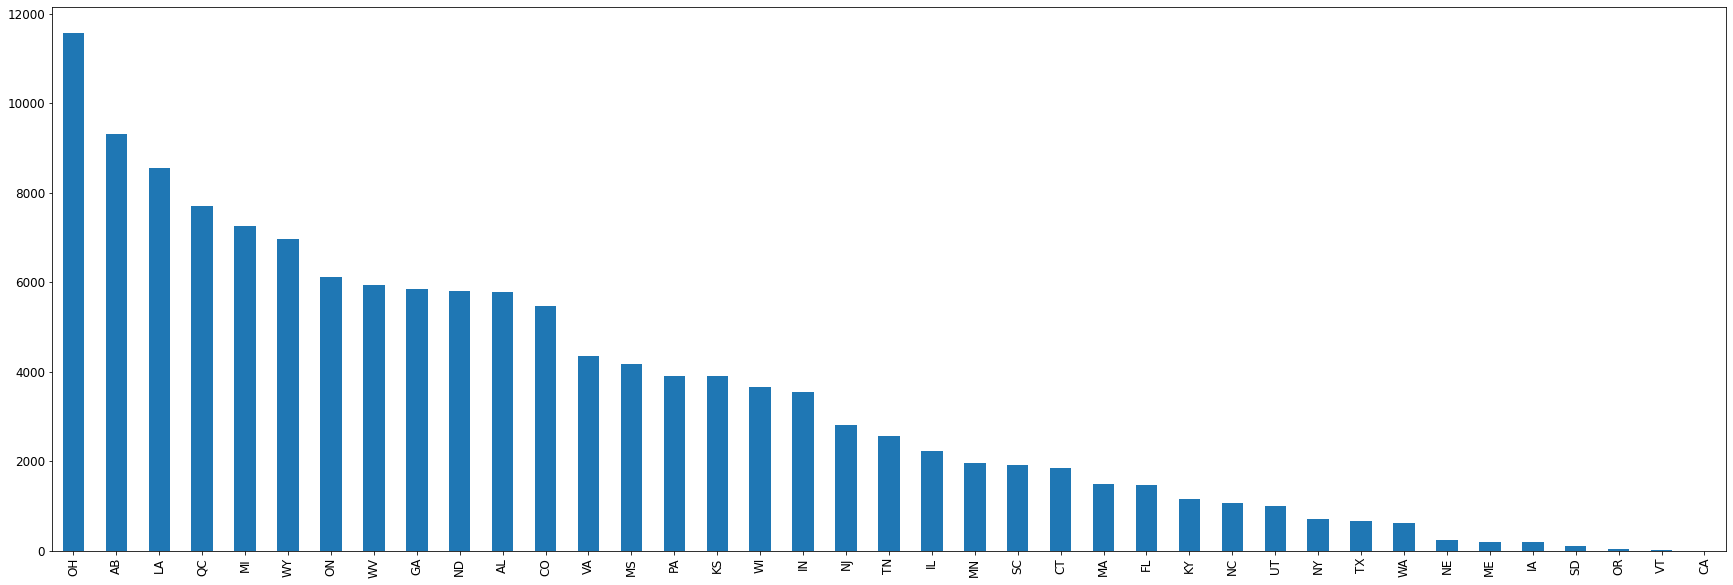

In [167]:
# List of Provinces/States detinations
trans_data.OriginJurisdiction.value_counts().plot.bar(figsize = [30, 10], fontsize = 12)

In [168]:
# Save the clean datasets to Excel Spreadsheets
active_geo_data.to_excel('NGL_Active_GEO_Data.xlsx', sheet_name='NGL')
complete_geo_data.to_excel('NGL_Complete_GEO_Data.xlsx', sheet_name='NGL')
trans_data.to_excel('NGL_Transactional_Data.xlsx', sheet_name='NGL')
!cp NGL_Active_GEO_Data.xlsx "/content/drive/My Drive/Colab_Data/"
!cp NGL_Complete_GEO_Data.xlsx "/content/drive/My Drive/Colab_Data/"
!cp NGL_Transactional_GEO_Data.xlsx "/content/drive/My Drive/Colab_Data/"

cp: cannot stat 'NGL_Transactional_GEO_Data.xlsx': No such file or directory


## Geolocate Data

In [169]:
# Install necessary Libraries, uncomment if required
!pip install geopandas
!pip install folium
import folium # map rendering library
from folium import plugins
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import LineString, Point
import matplotlib.cm as cm
import matplotlib.colors as colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [199]:
# Convert an address (Entidad, Municipio) into latitude and longitude values
address = input('Enter City, Province/State: ')

geolocator = Nominatim(user_agent="na_explorer")
try:
    location = geolocator.geocode(address, timeout=10)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
except AttributeError:
    print('Cannot Geocode {}'.format(address))
    latitude = np.nan
    longitude = np.nan


Enter City, Province/State: Can SupOil, AB
Cannot Geocode Can SupOil, AB


In [220]:
# Create a new Dataframe for Unique Destinations
geo_destinations = geo_data[['trip_destn','trip_desti']].groupby(['trip_destn','trip_desti']).count().reset_index()
geo_destinations

,trip_destn,trip_desti
0,AB,Acheson
1,AB,Bruderheim
2,AB,Calgary
3,AB,Can SupOil
4,AB,Can Supoil
...,...,...
486,WY,Bonneville
487,WY,Gillette
488,WY,Hi Light
489,WY,Reliance


In [221]:
# Geo locate Destinations
geolocator = Nominatim(user_agent='na_explorer')
Lat = []
Lon = []

for i in range(len(geo_destinations)):
  try:
    location = geolocator.geocode(geo_destinations['trip_desti'][i] + ', ' + geo_destinations['trip_destn'][i], timeout=10)
    print('The geograpical coordinate of {}, {} is {}, {}.'.format(geo_destinations['trip_desti'][i], geo_destinations['trip_destn'][i], location.latitude, location.longitude))
    Lat.append(location.latitude)
    Lon.append(location.longitude)
  except AttributeError:
    print('Cannot Geocode {}, {}'.format(geo_destinations['trip_desti'][i], geo_destinations['trip_destn'][i]))
    Lat.append(np.nan)
    Lon.append(np.nan)

geo_destinations['Latitude'] = Lat
geo_destinations['Longitude'] = Lon

The geograpical coordinate of Acheson, AB is 53.5459141, -113.7715761.
The geograpical coordinate of Bruderheim, AB is 53.8019065, -112.9281172.
The geograpical coordinate of Calgary, AB is 51.0460954, -114.065465.
Cannot Geocode Can SupOil, AB
Cannot Geocode Can Supoil, AB
Cannot Geocode Cansupoil, AB
Cannot Geocode Clobar, AB
The geograpical coordinate of Clover Bar, AB is 53.5885762, -113.3293178.
The geograpical coordinate of E Edmonton, AB is 53.6407668, -113.448941.
The geograpical coordinate of Edmonton, AB is 53.535411, -113.507996.
The geograpical coordinate of Edson, AB is 53.5844359, -116.4482935.
Cannot Geocode FtSaskatch, AB
Cannot Geocode Ftsaskatc, AB
Cannot Geocode Ftsaskatch, AB
The geograpical coordinate of Gaudin, AB is 47.8573505, 2.2474813.
The geograpical coordinate of Grande Pra, AB is 51.50461275, -0.3714247636965291.
Cannot Geocode High Prair, AB
The geograpical coordinate of Homeglen, AB is 52.7998699, -114.0741251.
The geograpical coordinate of Joffre, AB is 

In [218]:
# Sort if required
# geo_destinations.sort_values('trip_desti', inplace=True)
# geo_destinations

,trip_destn,trip_desti,Latitude,Longitude
38,BC,Abbotsford,53.545914,-113.771576
255,NC,Aberdeen,53.801907,-112.928117
0,AB,Acheson,51.046095,-114.065465
296,NY,Albany Tfr,53.588576,-113.329318
121,IA,Algona,53.640767,-113.448941
...,...,...,...,...
113,FL,Winter Hvn,43.268448,-108.072283
183,MD,Woodensbrg,44.290635,-105.501876
435,UT,WoodsCross,41.780891,-110.565291
371,PA,York,41.656247,-109.192443


In [222]:
# Export Western Cities to CSV File
geo_destinations.to_csv('geo_destinations.csv')
!cp geo_destinations.csv "/content/drive/My Drive/Colab_Data/"

In [223]:
# Drop rows with NaN cells
geo_destinations = geo_destinations.dropna(axis=0)
print(geo_destinations.shape)
geo_destinations.isnull().any()

(383, 4)


trip_destn    False
trip_desti    False
Latitude      False
Longitude     False
dtype: bool

In [225]:
# create a North America map using latitude and longitude values from destinations
na_map = folium.Map(location=[37, -95], zoom_start=4)

# add markers to map
for lat, lon, city in zip(geo_destinations['Latitude'], geo_destinations['Longitude'], geo_destinations['trip_desti']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_opacity = 1,
        parse_html=False).add_to(na_map)  
 
na_map

## Weekly Seasonality

In [229]:
# Extract Seasonal Data
daily_data = active_geo_data[['actual_dep','quantity']].groupby(by=active_geo_data['actual_dep']).sum().reset_index()
daily_data

,actual_dep,quantity
0,1/11/2022 16:42,0.0
1,1/11/2022 7:00,0.0
2,1/12/2022 13:55,0.0
3,1/12/2022 2:09,141626.0
4,1/13/2022 7:00,0.0
...,...,...
1050,7/5/2022 7:41,0.0
1051,7/5/2022 8:01,0.0
1052,7/5/2022 8:11,125996.0
1053,7/5/2022 8:12,127958.0


In [231]:
# Import FB Prophet
from fbprophet import Prophet
# Create FB Prophet Model
prophet = daily_data.rename(columns={'actual_dep':'ds','quantity':'y'}) 
m=Prophet(daily_seasonality=True)
m.fit(prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


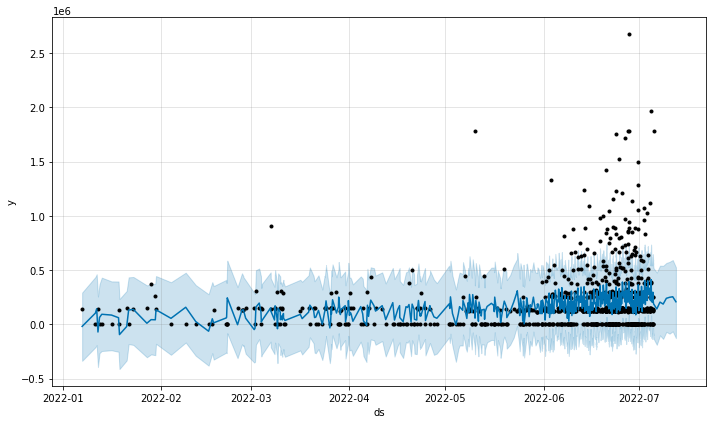

In [232]:
# Forecast one week in the future
periods = 7
future=m.make_future_dataframe(periods)
forecast=m.predict(future)
figure1=m.plot(forecast, xlabel='ds', ylabel='y')

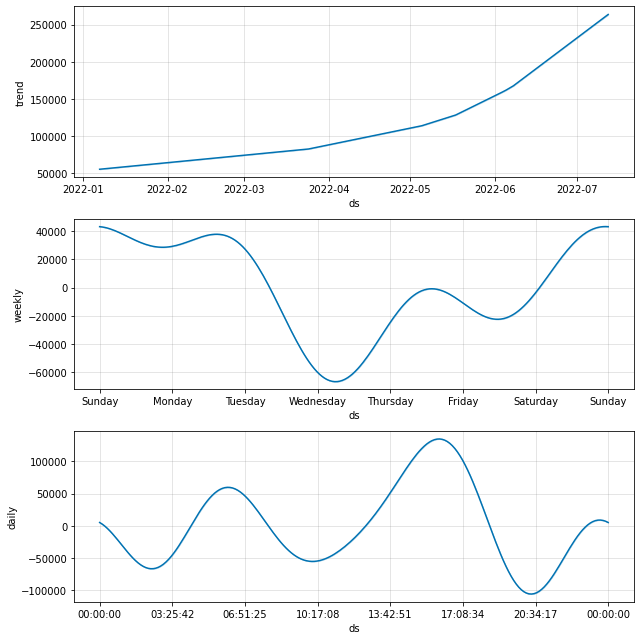

In [233]:
figure2=m.plot_components(forecast)